---
# Esercitazione 4
---
## Esercizio 4 - Dinamica molecolare
Il codice in C++ fornito per questa esercitazione riguarda la simulazione della Dinamica Molecolare di un sistema di particelle, ovvero dell'evoluzione temporale di particelle interagenti. Il codice permette di calcolare l'energia potenziale, cinetica, e totale per ogni particella del sistema, insieme alla sua energia totale e alla temperatura. Per fare ciò, si utilizzano due diversi algoritmi che verranno poi confrontati: l'algoritmo di Verlet NVE (numero di particelle N, volume V ed Energia totale E constanti) e l'algoritmo di Metropolis NVT (numero di particelle N, volume V e temperatura T costanti), quest'ultimo descritto e usato nell'esercitazione $7$. 

### Spiegazione dell'algoritmo di Verlet
L'algoritmo di Verlet è utilizzato per il calcolo computazionale delle equazioni del moto di un sistema dinamico di particelle. L'algoritmo di Verlet si basa sullo sviluppo in serie della funzione posizione; sommando infatti quello fatto in $t+\delta t$ e quello in $t-\delta t$, i termini di ordine dispari si eliminano, lasciando la seguente espressione:

$$
\vec{r}(t+\delta t) = 2 \vec{r}(t) - \vec{r}(t-\delta t) + \delta t^2 \cdot\vec{a}(t) + o(\delta t^4)
$$

Ciò significa che la posizione di una particella all'istante successivo si ottiene a partire da quella all'istante precedente e all'instante attuale (è un algoritmo a due passi), insieme all'accelerazione (la velocità è calcolabile come rapporto incrementale tra le posizioni). La dipendenza da due istanti di tempo diversi indica che Verlet non è "self-starting": la posizione e la velocità iniziali non bastano a iniziare la simulazione dinamica.

Il potenziale di interazione considerato per il sistema di particelle è quello di Lennard-Jones:

$$
V(r) = 4 \cdot \epsilon [(\sigma/r)^{12} - (\sigma/r)^6]
$$

dove $\sigma$ è una lunghezza ed è proporzionale alla distanza intermolecolare per cui il potenziale assume il valore minimo, mentre $-\epsilon$ è il valore del potenziale nel minimo. Con questo potenziale si considera un forte contributo repulsivo in caso due particelle si avvicinino troppo, sommato a un contributo attrittivo che prevale a distanze maggiori.

Per l'inizializzazione delle posizioni delle particelle ha senso partire da una configurazione cristallina precisa (nel nostro caso fcc). Un'assegnazione delle posizioni casuali, infatti, rischierebbe di collocare particelle troppo vicine tra loro, o addirittura sovrapposte, causando forze d'interazione troppo elevate e dunque un tempo di assestamento elevato. Invece di inizializzare l'algoritmo con anche le posizioni al tempo precedente, si è scelto di partire dalla generazione di velocità casuali, e a quel punto basta osservare che:

$$
\vec{r}(t-\delta t) = \vec{r}(t) - \vec{v_0} \cdot \delta t
$$

dove $\vec{v_0}$ è la velocità di una particella a cui si è sottratta la velocità media di drift (velocità totale), in modo da osservare il sistema del centro di massa e procedere con una corretta stima delle grandezze termodinamiche.

Tra i parametri d'ingresso dell'algoritmo vi è la temperatura del sistema di particelle; essa è utilizzata per ottenere un sistema con questa temperatura iniziale. Ogni componente della velocità viene estratta da distribuzione gaussiana con media nulla e larghezza pari alla radice di quella temperatura: la distribuzione delle velocità è infatti quella di Maxwell-Boltzmann.

Un aspetto interessante della simulazione riguarda la semplificazione del problema considerando solo una cella rappresentativa, utilizzando poi opportune condizioni al contorno. In questo modo è possibile simulare cristalli di dimensioni infinite, riferendosi unicamente a quella cella. Nel codice sono stati utilizzati come parametri il numero di particelle nella cella rappresentativa e la loro densità volumica ($\rho$); da questi dati è immediato ricavare il volume della cella e dunque il suo lato (dalla radice cubica). Nel modello, verrà considerata solo l'interazione tra particelle vicine, ovvero entro una distanza $r_c$ da ogni particella; questo parametro è detto $\textit{raggio di cutoff}$ ed è stato impostato ad un valore pari a metà della larghezza della box. Il taglio introdotto causa un errore di approssimazione che va bilanciato; nel modello verranno dunque implementate correzioni, dette $\textit{di coda}$, sui potenziali. 

Una scelta naturale delle unità di misura riguarda considerare la distanza, l'energia e la temperatura in unità rispettivamente di $\sigma$, $\epsilon$ e $\epsilon/k_B$ (con $k_B$ costante di Boltzmann, ovvero si lavora anche in unità di massa). In queste unità di misura, dette di Lennard-Jones, è possibile simulare diversi sistemi contemporaneamente; infatti, infinite combinazioni di $\rho$, $T$, $\epsilon$, $\sigma$ corrispondono allo stesso sistema in unità ridotte (indicate con un apice *), e quindi daranno lo stesso risultato numerico: ciò è detta $\textit{legge degli stati corrispondenti}$. L'utilizzo di unità ridotte permette inoltre di evitare problemi computazionali di underflow e overflow, causati dall'utilizzo di numeri troppo grandi o troppo piccoli.

Date posizione e velocità iniziali (in 3D) di ogni particella, si ricava la forza totale agente su ognuna, a partire da $\textit{meno}$ il gradiente del potenziale di Lennard-Jones. Si osservi che in unità ridotte, dato che $m=1$, forza e accelerazione coincidono; è dunque possibile calcolare la posizione di ogni elemento nell'istante successivo con la formula sopra riportata. A questo punto, $\vec{r}(t+\delta t)$ e $\vec{r}(t)$ di ogni particella prendono rispettivamente il ruolo di è $\vec{r}(t)$ e $\vec{r}(t-\delta t)$ dello step successivo. Si procede in modo analogo al calcolo delle nuove forze e delle nuove posizioni $\vec{r}(t+\delta t)$, fino al raggiungimento dell'equilibrio termodinamico. A questo punto si procede calcolando l'energia totale, potenziale e cinetica del sistema, insieme alle variabili termodinamiche quali temperatura e pressione: si effettua dunque la "misura".

## Esercizio 4.1 e 4.2
Nel primo punto dell'esercitazione è stato incluso il calcolo della pressione, stimata grazie al teorema del viriale (di equipartizione). Per un sistema macrocanonico in cui si utilizza il potenziale di Lennard-Jones, può essere stimata dalla seguente espressione:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

dove il termine mediato è il viriale. $\\$
Di seguito verranno riportati i risultati ottenuti con questo approccio, simulando la dinamica molecolare di atomi di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nei tre differenti stati di aggregazione:
1. Stato solido: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. Stato liquido: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. Stato gassoso: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Per ogni stato vengono mostrati i risultati a blocchi dell'energia potenziale per particella $U/N$, dell'energia cinetica per particella $K/N$, dell'energia totale interna per particella $E/N$, della temperatura $T$ e della pressione $P$, il tutto in unità ridotte di Lennard-Jones.

# Stato solido
Prima di effettuare l'analisi è necessario osservare quanto segue. Viene qui riportato l'andamento della temperatura misurata nel caso dello stato solido, al variare degli step temporali incrementati (2000 step di ampiezza 0.0005 in unità ridotte).

In [1]:
# Carico il file dell'andamento della temperatura al variare degli step
import matplotlib.pyplot as plt
import numpy as np

temp = np.loadtxt("./Equilibration/Equilibration_Solid_0-8.dat", unpack= True, usecols=(0), skiprows=0)

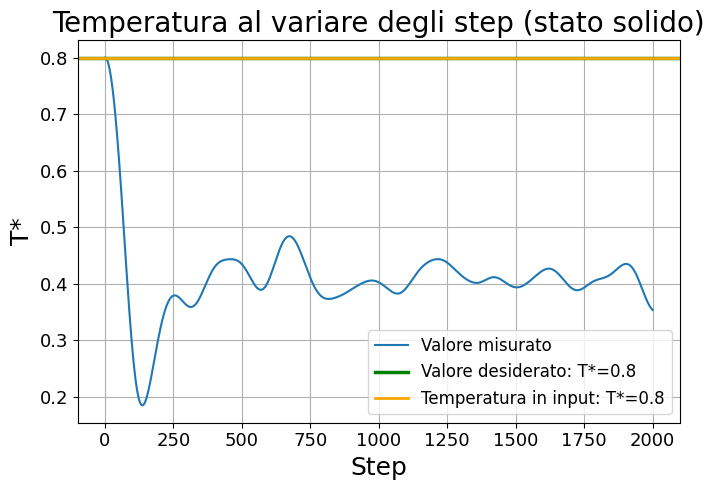

In [2]:
N = len(temp)           # numero di step
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Temperatura al variare degli step (stato solido)",fontsize=20)

plt.plot(x, temp, label = "Valore misurato")

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"T*", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=0.8, xmin=0, xmax=1, label=r'Valore desiderato: T*=0.8', lw = 2.5, color = 'green')
plt.axhline(y=temp[0], xmin=0, xmax=1, label=f'Temperatura in input: T*={temp[0]:.3}', lw = 2, color = 'orange')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

Si osserva che non è corretto partire da una temperatura pari al valore desiderato. Infatti, il sistema si trova inizialmente in una configurazione ottimale di cristallo perfetto e viene poi fatto evolvere con il modello di Dinamica Molecolare sviluppato. Si nota da subito una diminuzione significativa della temperatura del sistema, la quale, dopo qualche centinaio di step, inizia ad oscillare attorno ad un valore inferiore a quello desiderato (pari a $T^* = 0.8  \epsilon/k_B$). Ciò è dovuto al fatto che la configurazione cristallina minimizza il potenziale di Lennard-Jones. Infatti, una qualsiasi configurazione diversa da questa presenta almeno una particella più vicina ad un gruppo di particelle e più lontana da altre. Dato che il termine repulsivo "vince" a distanze inferiori, l'avvicinarsi di questa particella ad altre causa un contributo positivo ulteriore al potenziale, che dunque cresce. Dato che l'energia totale si conserva, un'energia potenziale maggiore corrisponde a un'energia cinetica inferiore, pertanto la temperatura si riduce. Ciò è vero sia per la configurazione solida che liquida. $\\$
Per ottenere una temperatura all'equilibrio pari a circa quella desiderata è necessario dunque un valore superiore di partenza.

Diversi tentativi di valori in input hanno permesso di constatare che il valore cercato è circa $T^* = 1.541 \epsilon/k_B$. I risultati sono qui riportati.

In [3]:
# Carico il file dell'andamento della temperatura al variare degli step
import matplotlib.pyplot as plt
import numpy as np

temp = np.loadtxt("./Equilibration/Equilibration_Solid_1-54.dat", unpack= True, usecols=(0), skiprows=0)

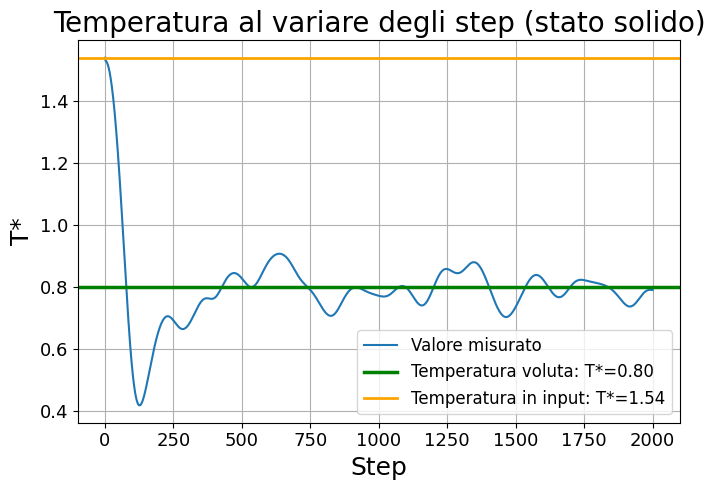

In [5]:
N = len(temp)        # numero di step
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Temperatura al variare degli step (stato solido)",fontsize=20)

plt.plot(x, temp, label = "Valore misurato") # plotto

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"T*", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=0.80, xmin=0, xmax=1, label=r'Temperatura voluta: T*=0.80', lw = 2.5, color = 'green')
plt.axhline(y=temp[0], xmin=0, xmax=1, label=f'Temperatura in input: T*={temp[0]:.3}', lw = 2, color = 'orange')

plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

La temperatura maggiore scelta permette di raggiungere l'equilibrio desiderato. $\\$
Le analisi saranno effettuate dopo aver portato ad equilibrio il sistema, effettuando in anticipo $2000$ passi. Vengono utilizzati $100$ blocchi da $3000$ step ognuno. I risultati sono qui riportati.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Carico tutti i file delle misure
ekin, error_ekin   = np.loadtxt("Solido/output_ekin.dat", usecols=(2,3), unpack = 'true')
epot, error_epot   = np.loadtxt("Solido/output_epot.dat", usecols=(2,3), unpack = 'true')
etot, error_etot   = np.loadtxt("Solido/output_etot.dat", usecols=(2,3), unpack = 'true')
temp, error_temp   = np.loadtxt("Solido/output_temp.dat", usecols=(2,3), unpack = 'true')
press, error_press = np.loadtxt("Solido/output_pressure.dat", usecols=(2,3), unpack = 'true')

# Parametri Argon per convertire le unità di misura:
# m = 39.948 * 1.66e-27 # kg # non serve
T_star = 0.8 # temperatura voluta
rho_star = 1.1 # densità di particelle in unità ridotte

Npart = 108
V_star = Npart / rho_star # volume in unità ridotte

K_b = 8.6167e-2 # costante di Boltzmann [meV / K]
T_factor = 120 # [K] per conversione temperatura in Kelvin: T[K] = T_factor * T_star
epsilon = T_factor * K_b # [meV] * 1.3806488e-23 [J] , per conversione energia (pot, kin, tot) in meV: E[meV] = epsilon * E_star

sigma = 0.34 # [nm]

V = V_star*sigma**3 # Volume in [m^3]
P_factor = ((T_factor*1.3806488)/(V_star*sigma**3*10.13)) # [atm] per conversione pressione in atmosfere: P = press_factor * P^*
# deriva da P = P_star * epsilon / V con  V = V_star * sigma^3
# divido per 10.13 perché la costante di Boltzamn in J/K è dell'ordine 10^-23, ma divido per sigma^3 in nanometri cubi ottenendo un ordine di 10^4 in Pascal
# divido poi per 1.013e5 per la conversioni in atmosfere

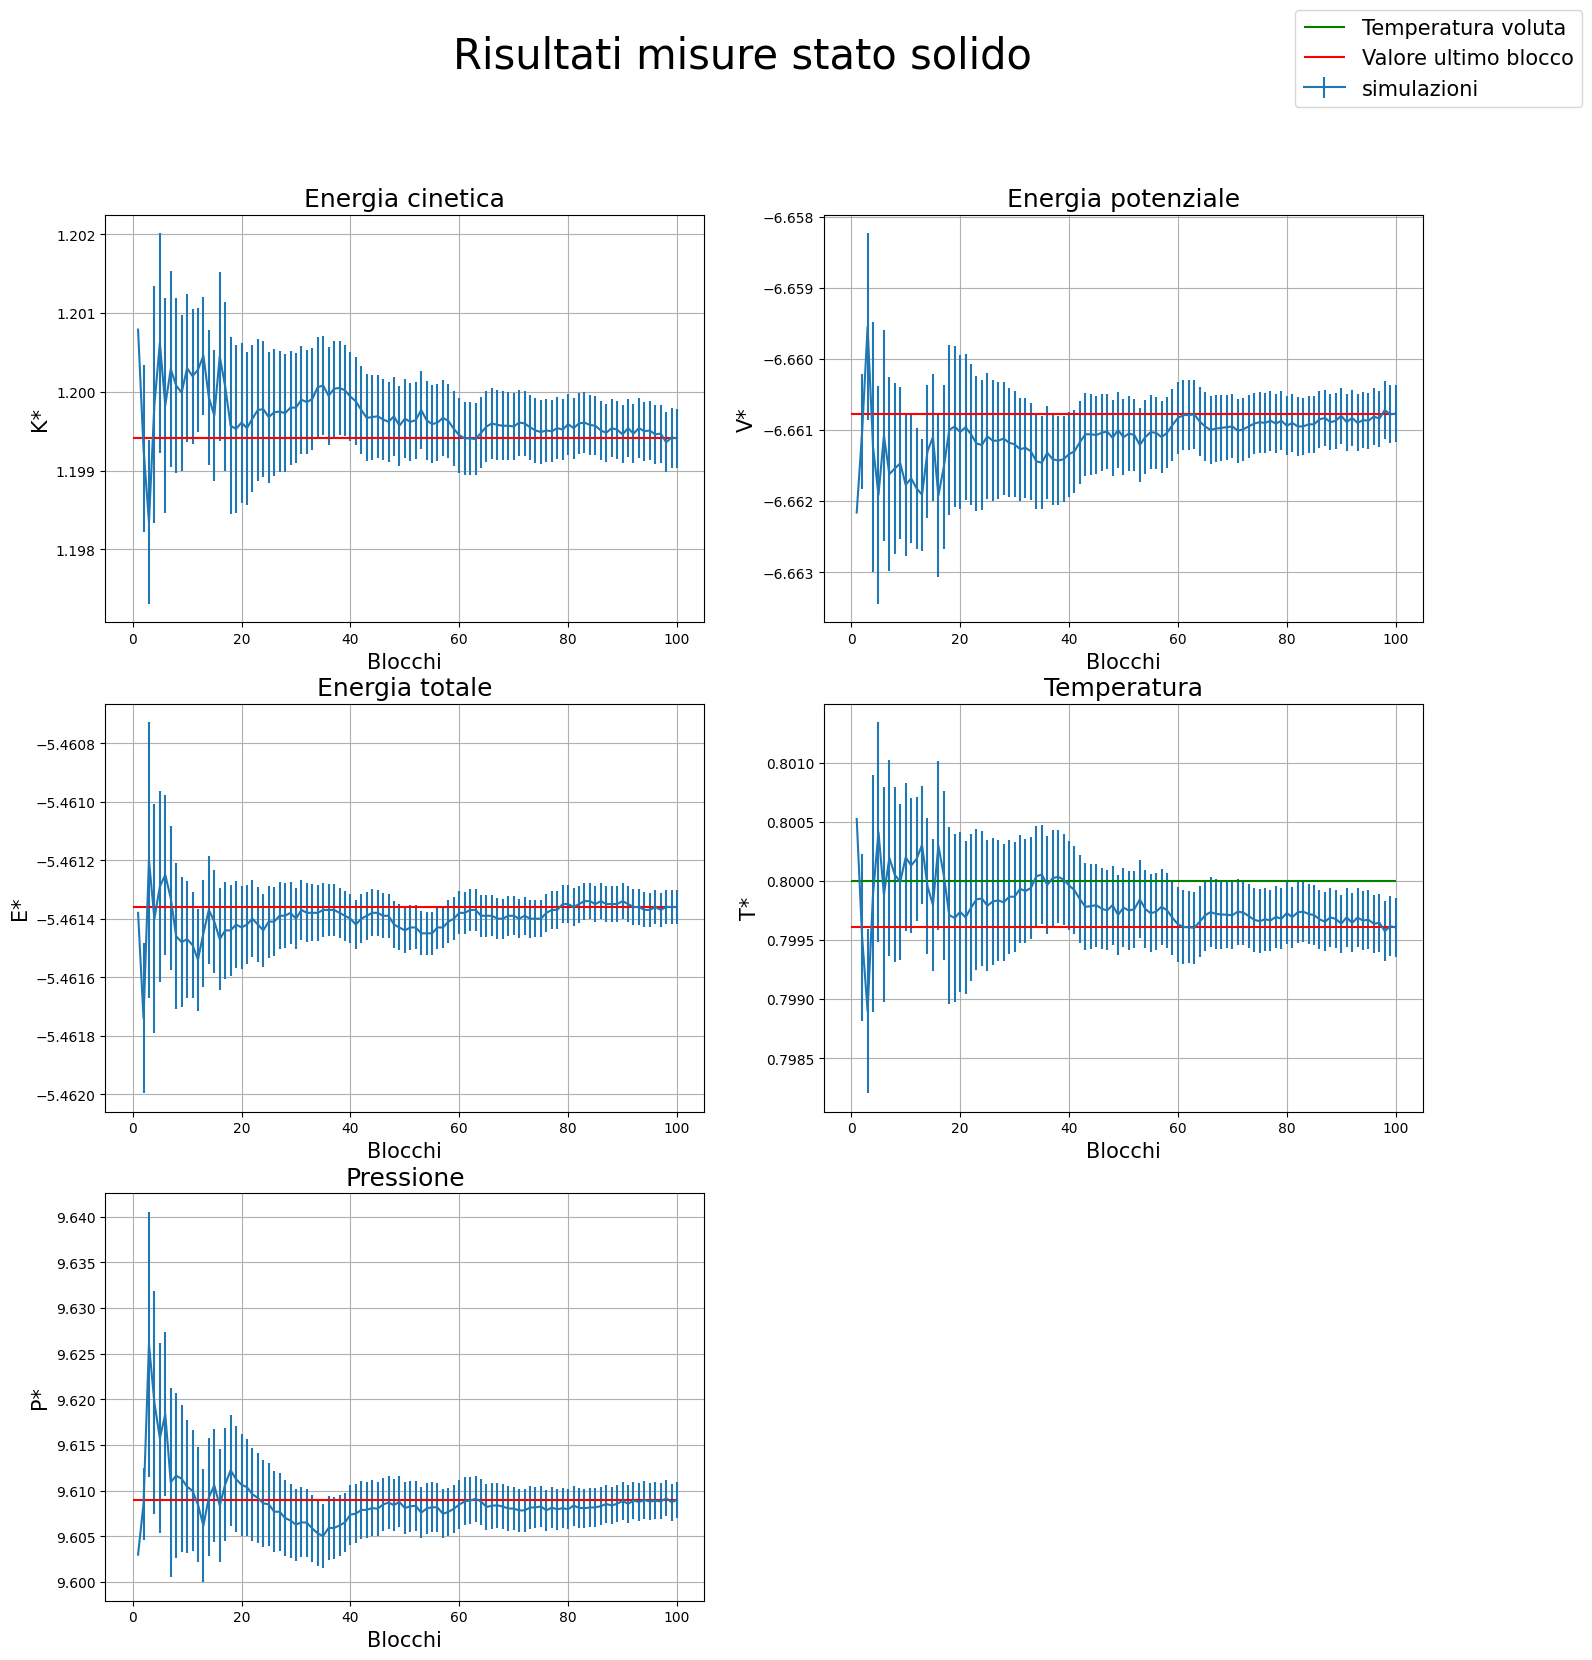

Valor medio Energia cinetica (K*/N):  1.1994 +\- 0.0004
In meV: 12.402 +\- 0.004


Valor medio Energia potenziale (V*/N):  -6.6608 +\- 0.0004
In meV: -68.873 +\- 0.004


Valor medio Energia totale (E*/N):  -5.4614 +\- 0.0001
In meV: -56.471 +\- 0.001


Valor medio temperatura (T*):  0.7996 +\- 0.0003
In Kelvin: 95.95 +\- 0.03
Livello di confidenza con il valore voluto:  1.56 sigma
Differenza percentuale con il valore voluto: 0.67 %


Valor medio pressione (P*):  9.609 +\- 0.002
In atmosfere: 40.725 +\- 0.008




In [7]:
N=len(press) # number of blocks

x = np.arange(1,N+1)

fig, axs = plt.subplots(3,2, figsize = (17,18))
fig.suptitle("Risultati misure stato solido", fontsize = (30))

plt.subplot(3,2,1)
plt.errorbar(x,ekin,yerr=error_ekin)
plt.title("Energia cinetica", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("K*", fontsize = 15)
plt.hlines(ekin[-1] ,0 ,N, color = "red")
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x,epot,yerr=error_epot)
plt.title("Energia potenziale", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("V*", fontsize = 15)
plt.hlines(epot[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplot(3,2,3)
plt.errorbar(x,etot,yerr=error_etot)
plt.title("Energia totale", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("E*", fontsize = 15)
plt.hlines(etot[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x,temp,yerr=error_temp )
plt.title("Temperatura", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("T*", fontsize = 15)
plt.hlines(temp[-1] ,0 ,N, color = "red") 
plt.hlines(T_star ,0 ,N, color = "green" , label = "Temperatura voluta") 
plt.grid(True)

plt.subplot(3,2,5)
plt.errorbar(x,press,yerr=error_press , label = "simulazioni")
plt.title("Pressione", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("P*", fontsize = 15)
plt.hlines(press[-1] ,0 ,N, color = "red" , label = "Valore ultimo blocco") 
plt.grid(True)

plt.subplot(3,2,6)
plt.axis("off")

fig.legend(fontsize = 15)

plt.show()


print("Valor medio Energia cinetica (K*/N): ", round(ekin[-1],4), "+\-", round(error_ekin[-1],4))
print("In meV:", round(ekin[-1]*epsilon,3), "+\-", round(error_ekin[-1]*epsilon,3))
print("\n")

print("Valor medio Energia potenziale (V*/N): ", round(epot[-1],4), "+\-", round(error_epot[-1],4))
print("In meV:", round(epot[-1]*epsilon,3), "+\-", round(error_epot[-1]*epsilon,3))
print("\n")

print("Valor medio Energia totale (E*/N): ", round(etot[-1],4), "+\-", round(error_etot[-1],4))
print("In meV:", round(etot[-1]*epsilon,3), "+\-", round(error_etot[-1]*epsilon,3))
print("\n")

print("Valor medio temperatura (T*): ", round(temp[-1],4), "+\-", round(error_temp[-1],4))
print("In Kelvin:", round(temp[-1]*T_factor,2), "+\-", round(error_temp[-1]*T_factor,3))
print("Livello di confidenza con il valore voluto: ", np.abs(round((temp[-1] - T_star)/error_temp[-1],2)), "sigma")
print("Differenza percentuale con il valore voluto:", round(100*temp[-1]/T_factor,2), "%")

print("\n")

print("Valor medio pressione (P*): ", round(press[-1],3), "+\-", round(error_press[-1],3))
print("In atmosfere:", round(press[-1]*P_factor,3), "+\-", round(error_press[-1]*P_factor,3))
print("\n")

Dai risultati riportati è possibile notare che l'ultimo valore di temperatura ottenuto dopo $100$ blocchi corrisponde, sempre in unità ridotte, a circa $0.8$ entro un'unità $\sigma$, con una differenza inferiore al $1\%$. La discrepanza ottenuta è dovuta all'elevata non linearità tra il valore di temperatura di input e quello di quilibrio, rendendo dunque difficile una stima del corretto valore in ingresso da utilizzare.

# Stato liquido
Analogamente a quanto visto in precedenza, anche in questo caso la temperatura di input va impostata superiore a quella voluta ($1.1 \epsilon/k_B$); in questo caso essa corrisponde a circa $1.983 \epsilon/k_B$. I risultati sono qui riportati.

In [8]:
# Carico il file dell'andamento della temperatura al variare degli step
import matplotlib.pyplot as plt
import numpy as np

temp = np.loadtxt("./Equilibration/Equilibration_Liquid_1-983.dat", unpack= True, usecols=(0), skiprows=0)

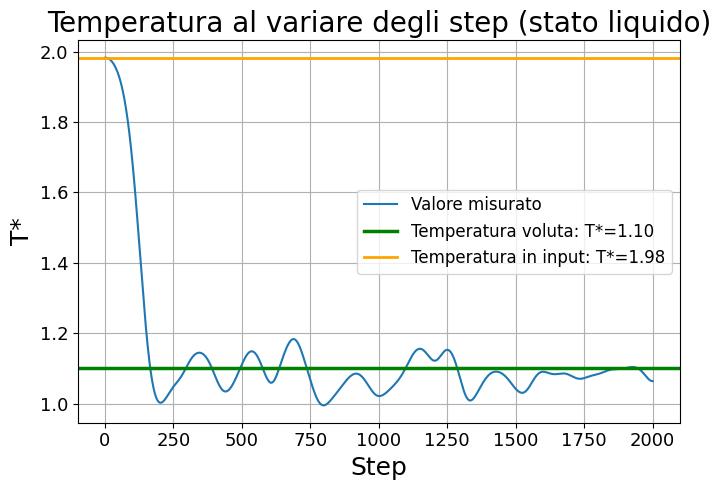

In [9]:
N = len(temp)           # numero di step
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Temperatura al variare degli step (stato liquido)",fontsize=20)

plt.plot(x, temp, label = "Valore misurato") # plotto

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"T*", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1.10, xmin=0, xmax=1, label=r'Temperatura voluta: T*=1.10', lw = 2.5, color = 'green')
plt.axhline(y=temp[0], xmin=0, xmax=1, label=f'Temperatura in input: T*={temp[0]:.3}', lw = 2, color = 'orange')

plt.legend(prop={'size': 12}) #, loc='lower right', )

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

Si procede a misurare le stesse grandezza fisiche analizzate in precedenza, sempre dopo aver portato ad equilibrio il sistema ed effettuando poi $3000$ step temporali.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Carico tutti i file delle misure
ekin, error_ekin   = np.loadtxt("Liquido/output_ekin.dat", usecols=(2,3), unpack = 'true')
epot, error_epot   = np.loadtxt("Liquido/output_epot.dat", usecols=(2,3), unpack = 'true')
etot, error_etot   = np.loadtxt("Liquido/output_etot.dat", usecols=(2,3), unpack = 'true')
temp, error_temp   = np.loadtxt("Liquido/output_temp.dat", usecols=(2,3), unpack = 'true')
press, error_press = np.loadtxt("Liquido/output_pressure.dat", usecols=(2,3), unpack = 'true')

# Parametri Argon per convertire le unità di misura:
# m = 39.948 * 1.66e-27 # kg # non serve
T_star = 1.1 # temperatura voluta
rho_star = 0.8 # densità di particelle in unità ridotte

Npart = 108
V_star = Npart / rho_star # volume in unità ridotte

K_b = 8.6167e-2 # costante di Boltzmann [meV / K]
T_factor = 120 # [K] per conversione temperatura in Kelvin: T[K] = T_factor * T_star
epsilon = T_factor * K_b # [meV] * 1.3806488e-23 [J] , per conversione energia (pot, kin, tot) in meV: E[meV] = epsilon * E_star

sigma = 0.34 # [nm]

V = V_star*sigma**3 # Volume in [m^3]
P_factor = ((T_factor*1.3806488)/(V_star*sigma**3*10.13)) # [atm] per conversione pressione in atmosfere: P = press_factor * P^*
# deriva da P = P_star * epsilon / V con  V = V_star * sigma^3
# divido per 10.13 perché la costante di Boltzamn in J/K è dell'ordine 10^-23, ma divido per sigma^3 in nanometri cubi ottenendo un ordine di 10^4 in Pascal
# divido poi per 1.013e5 per la conversioni in atmosfere

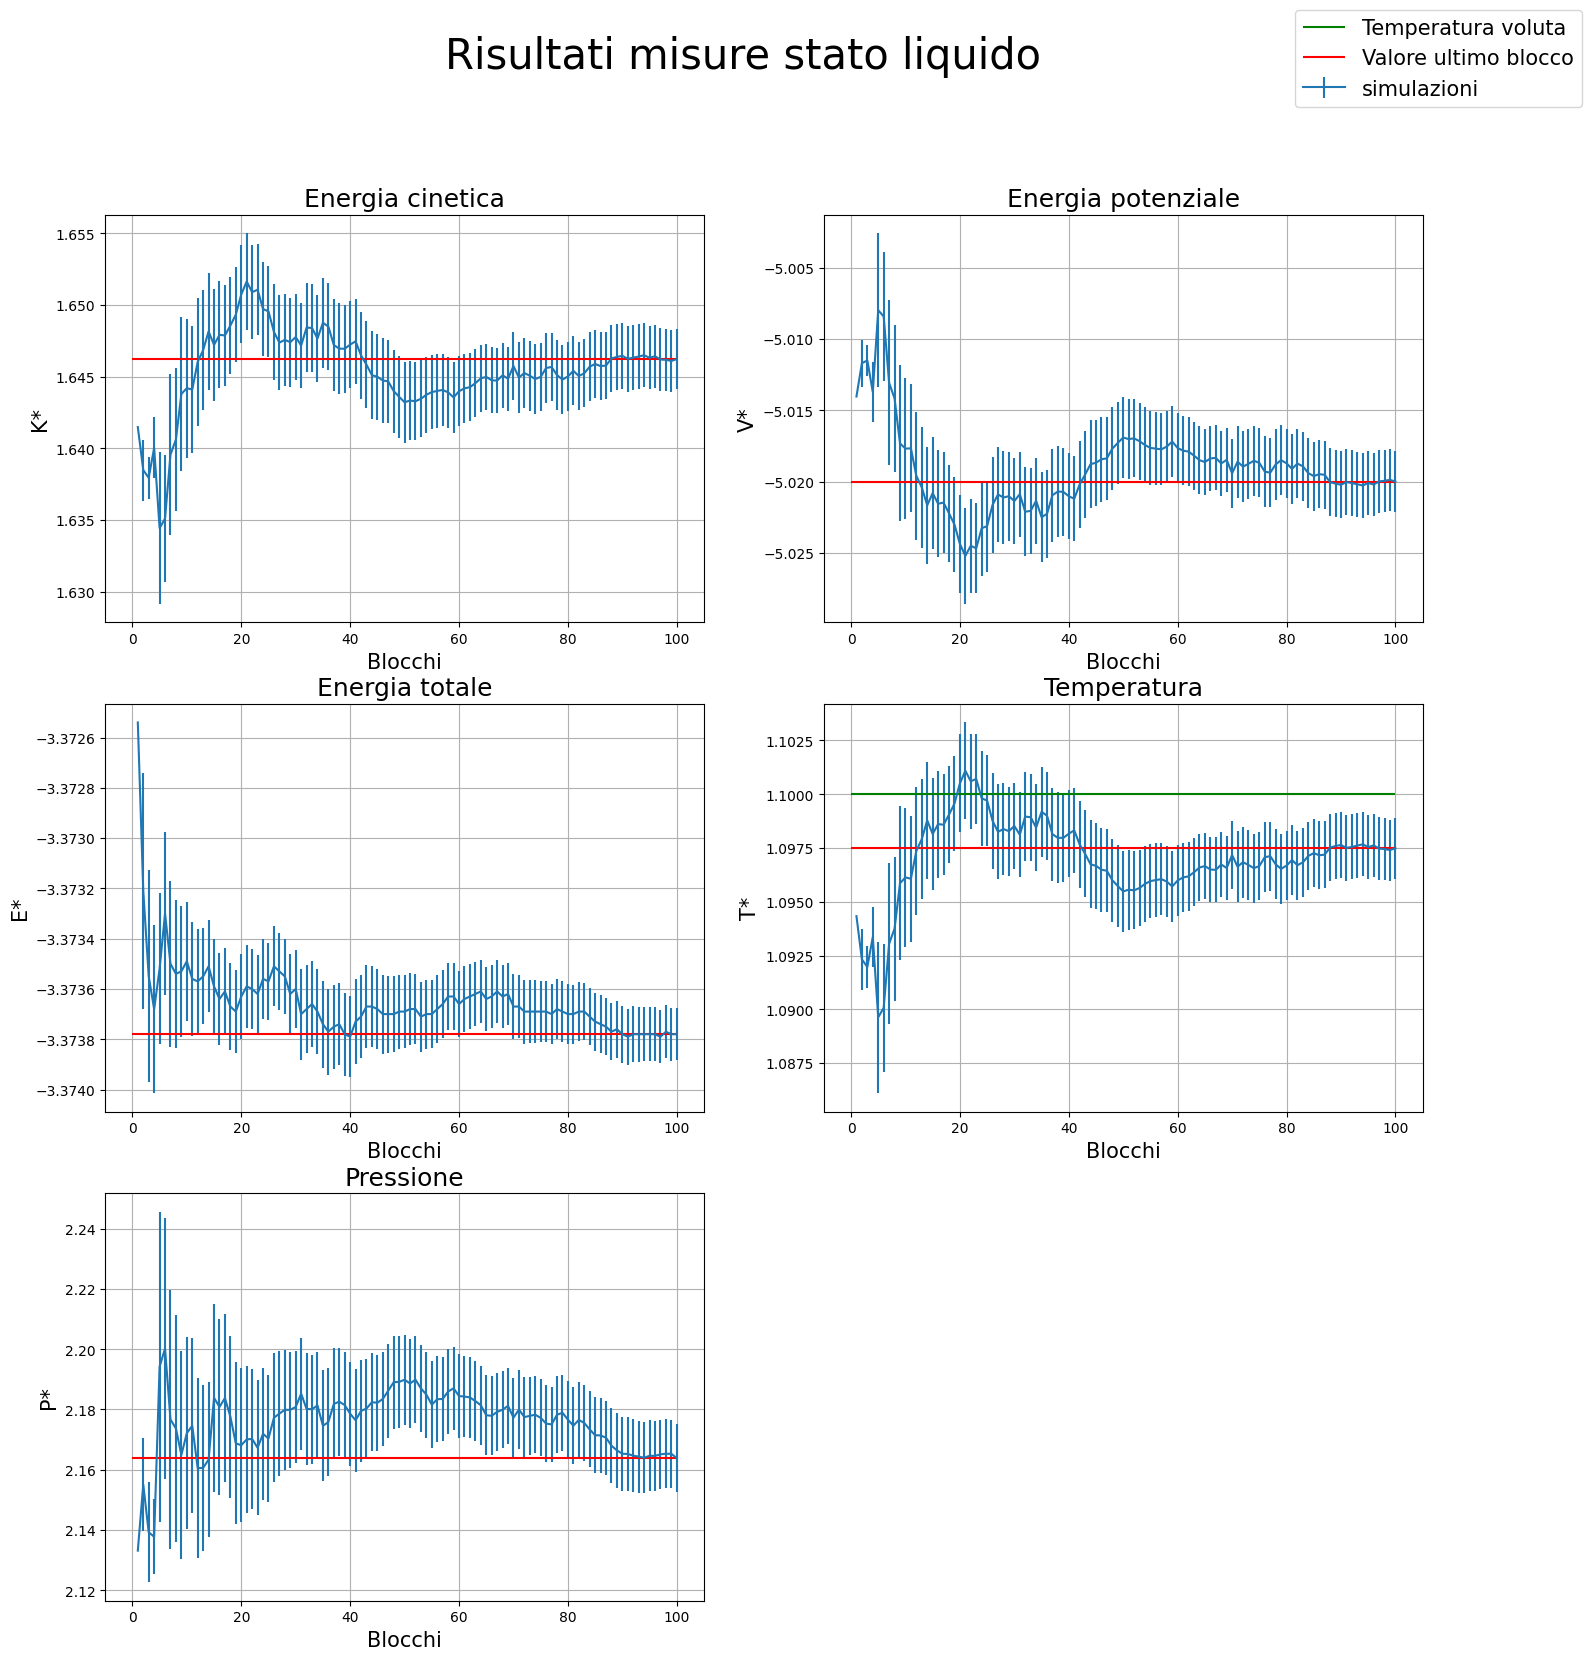

Valor medio Energia cinetica (K*/N):  1.6462 +\- 0.0021
In meV: 17.022 +\- 0.022


Valor medio Energia potenziale (V*/N):  -5.02 +\- 0.0021
In meV: -51.907 +\- 0.022


Valor medio Energia totale (E*/N):  -3.3738 +\- 0.0001
In meV: -34.885 +\- 0.001


Valor medio temperatura (T*):  1.0975 +\- 0.0014
In Kelvin: 131.7 +\- 0.169
Livello di confidenza con il valore voluto:  1.78 sigma
Differenza percentuale con il valore voluto: 0.91 %


Valor medio pressione (P*):  2.164 +\- 0.011
In atmosfere: 6.67 +\- 0.035




In [11]:
N=len(press) # number of blocks

x = np.arange(1,N+1)

fig, axs = plt.subplots(3,2, figsize = (17,18))
fig.suptitle("Risultati misure stato liquido", fontsize = (30))

plt.subplot(3,2,1)
plt.errorbar(x,ekin,yerr=error_ekin)
plt.title("Energia cinetica", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("K*", fontsize = 15)
plt.hlines(ekin[-1] ,0 ,N, color = "red")
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x,epot,yerr=error_epot)
plt.title("Energia potenziale", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("V*", fontsize = 15)
plt.hlines(epot[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplot(3,2,3)
plt.errorbar(x,etot,yerr=error_etot)
plt.title("Energia totale", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("E*", fontsize = 15)
plt.hlines(etot[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x,temp,yerr=error_temp )
plt.title("Temperatura", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("T*", fontsize = 15)
plt.hlines(temp[-1] ,0 ,N, color = "red") 
plt.hlines(T_star ,0 ,N, color = "green" , label = "Temperatura voluta") 
plt.grid(True)

plt.subplot(3,2,5)
plt.errorbar(x,press,yerr=error_press , label = "simulazioni")
plt.title("Pressione", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("P*", fontsize = 15)
plt.hlines(press[-1] ,0 ,N, color = "red" , label = "Valore ultimo blocco") 
plt.grid(True)

plt.subplot(3,2,6)
plt.axis("off")

fig.legend(fontsize = 15)

plt.show()


print("Valor medio Energia cinetica (K*/N): ", round(ekin[-1],4), "+\-", round(error_ekin[-1],4))
print("In meV:", round(ekin[-1]*epsilon,3), "+\-", round(error_ekin[-1]*epsilon,3))
print("\n")

print("Valor medio Energia potenziale (V*/N): ", round(epot[-1],4), "+\-", round(error_epot[-1],4))
print("In meV:", round(epot[-1]*epsilon,3), "+\-", round(error_epot[-1]*epsilon,3))
print("\n")

print("Valor medio Energia totale (E*/N): ", round(etot[-1],4), "+\-", round(error_etot[-1],4))
print("In meV:", round(etot[-1]*epsilon,3), "+\-", round(error_etot[-1]*epsilon,3))
print("\n")

print("Valor medio temperatura (T*): ", round(temp[-1],4), "+\-", round(error_temp[-1],4))
print("In Kelvin:", round(temp[-1]*T_factor,2), "+\-", round(error_temp[-1]*T_factor,3))
print("Livello di confidenza con il valore voluto: ", np.abs(round((temp[-1] - T_star)/error_temp[-1],2)), "sigma")
print("Differenza percentuale con il valore voluto:", round(100*temp[-1]/T_factor,2), "%")
print("\n")

print("Valor medio pressione (P*): ", round(press[-1],3), "+\-", round(error_press[-1],3))
print("In atmosfere:", round(press[-1]*P_factor,3), "+\-", round(error_press[-1]*P_factor,3))
print("\n")

Si può notare che anche in questo caso la discrepanza di temperatura misurata all'equilibrio con quella voluta è inferiore al $1\%$. Un altro aspetto interessante da notare è che nello stato liquido la pressione si è ridotta, rispetto allo stato solido. Infatti, lo stato di aggregazione liquido è meno legato di quest'ultimo, rendendo anche superiore la temperatura di equilibrio.

# Stato gassoso
Il caso di stato gassoso è particolare. Viene qui riportato l'andamento della temperatura al variare degli step temporali ($2000$), partendo da un valore in input pari a quello voluto.

In [12]:
# Carico il file dell'andamento della temperatura al variare degli step
import matplotlib.pyplot as plt
import numpy as np

temp = np.loadtxt("./Equilibration/Equilibration_Gas_1-2.dat", unpack= True, usecols=(0), skiprows=0)

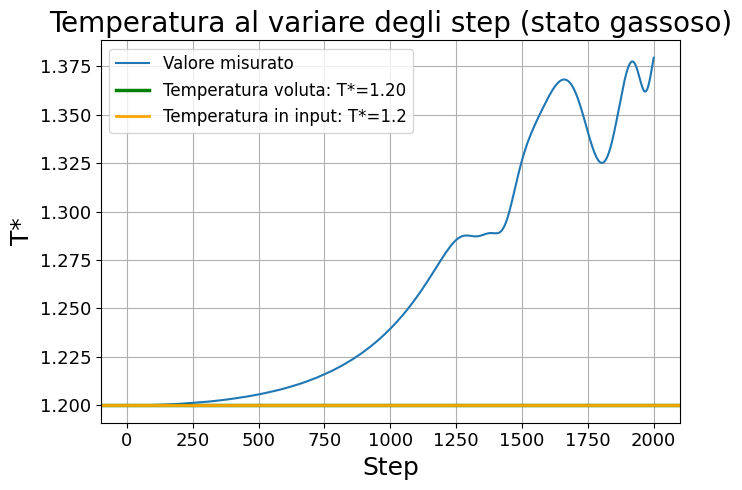

In [13]:
N = len(temp)           # numero di step
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Temperatura al variare degli step (stato gassoso)",fontsize=20)

plt.plot(x, temp, label = "Valore misurato") # plotto

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"T*", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1.20, xmin=0, xmax=1, label=r'Temperatura voluta: T*=1.20', lw = 2.5, color = 'green')
plt.axhline(y=temp[0], xmin=0, xmax=1, label=f'Temperatura in input: T*={temp[0]:.3}', lw = 2, color = 'orange')

plt.legend(prop={'size': 12}) #, loc='lower right', )

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

Si nota che, a differenza dei primi due casi, nello stato di aggregazione gassoso la temperatura tende ad aumentare. Questo aspetto è dovuto al fatto che la bassa densità di particelle fa sì che le loro interazioni siano molto inferiori rispetto ai casi liquido e solido, vince dunque il termine attrattivo (negativo) nel potenziale, aumentando così l'energia cinetica e dunque la temperatura. Per raggiungere il valore desiderato di $1.2 \epsilon/k_B$ è necessario partire da un valore inferiore. Tuttavia, si nota anche che 2000 step non sono sufficienti perché il sistema raggiunga un valore stabile di temperatura. Per questo motivo verrà mostrato l'andamento di temperatura effettuando 50000 step (ognuno di un intervallo temporale pari a 0.0005 in unità ridotte) a partire da una temperatura di input pari a $1.0 \epsilon/k_B$.

In [14]:
# Carico il file dell'andamento della temperatura al variare degli step
import matplotlib.pyplot as plt
import numpy as np

temp = np.loadtxt("./Equilibration/Equilibration_Gas_1_50k.dat", unpack= True, usecols=(0), skiprows=0)

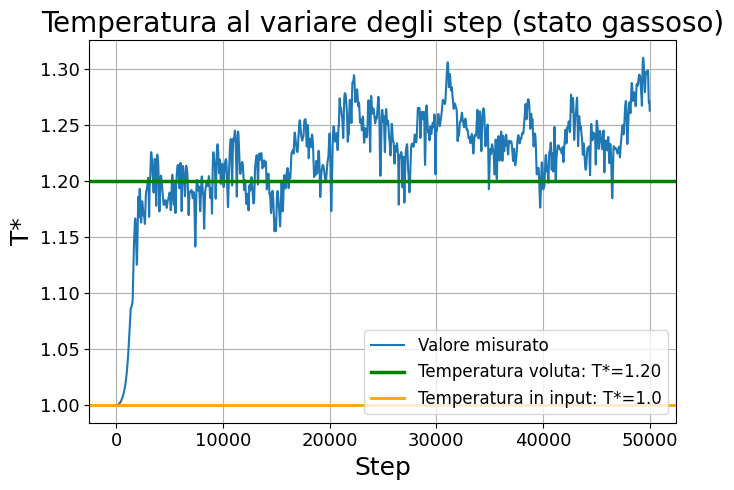

In [15]:
N = len(temp)           # numero di step
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Temperatura al variare degli step (stato gassoso)",fontsize=20)

plt.plot(x, temp, label = "Valore misurato") # plotto

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"T*", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1.20, xmin=0, xmax=1, label=r'Temperatura voluta: T*=1.20', lw = 2.5, color = 'green')
plt.axhline(y=temp[0], xmin=0, xmax=1, label=f'Temperatura in input: T*={temp[0]:.3}', lw = 2, color = 'orange')

plt.legend(prop={'size': 12}) #, loc='lower right', )

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

Si nota che $50000$ step effettuati non sembrano sufficienti a raggiungere una condizione di equilibrio. Tuttavia, sembrano esserci delle fluttuazioni cicliche. Per verificare questo aspetto viene qui riportato l'andamento della temperatura durante $100000$ step, sempre di larghezza temporale  da $0.0005$ e riducendo il valore di input a $0.965 \epsilon/k_B$.

In [23]:
# Carico il file dell'andamento della temperatura al variare degli step
import matplotlib.pyplot as plt
import numpy as np

temp = np.loadtxt("./Equilibration/Equilibration_Gas_0-965_0-0005.dat", unpack= True, usecols=(0), skiprows=0)

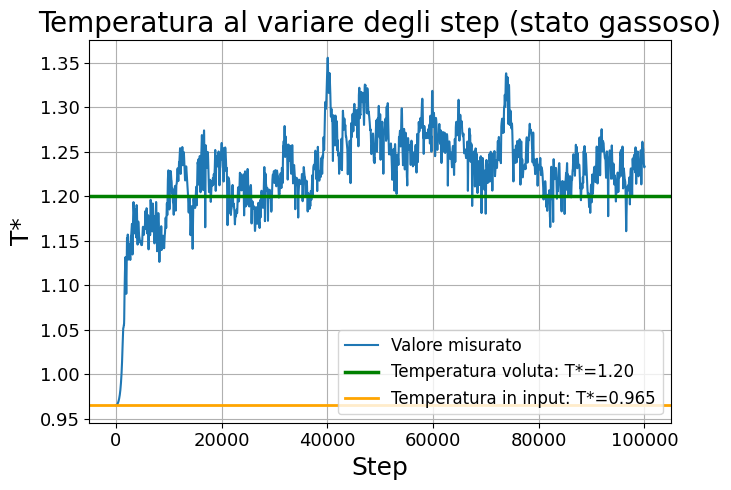

In [24]:
N = len(temp)           # numero di step
x = np.arange(1, N+1)   # x del grafico, numero di step: [1,2,...,Nstep]

plt.figure(figsize=(7, 5))
plt.title(r"Temperatura al variare degli step (stato gassoso)",fontsize=20)

plt.plot(x, temp, label = "Valore misurato") # plotto

plt.xlabel(r"Step", fontsize=18)
plt.ylabel(r"T*", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.axhline(y=1.20, xmin=0, xmax=1, label=r'Temperatura voluta: T*=1.20', lw = 2.5, color = 'green')
plt.axhline(y=temp[0], xmin=0, xmax=1, label=f'Temperatura in input: T*={temp[0]:.3}', lw = 2, color = 'orange')

plt.legend(prop={'size': 12}) #, loc='lower right', )

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

plt.show()

Come ipotizzato, la temperatura nel caso di stato gassoso presenta oscillazioni più ampie. Si nota che queste oscillazioni sembrano ridursi in ampiezza oltre gli $80000$ passi. Per misurare tutte le proprietà del sistema si procede dunque ad evolvere il sistema per $100000$ step, per poi eseguire un'analisi a blocchi, in cui per ognuno vengono effettuate le misure su medie da $20000$ passi. Di seguito sono riportati i risultati per $100$ blocchi.

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Carico tutti i file delle misure
ekin, error_ekin   = np.loadtxt("Gassoso/output_ekin.dat", usecols=(2,3), unpack = 'true')
epot, error_epot   = np.loadtxt("Gassoso/output_epot.dat", usecols=(2,3), unpack = 'true')
etot, error_etot   = np.loadtxt("Gassoso/output_etot.dat", usecols=(2,3), unpack = 'true')
temp, error_temp   = np.loadtxt("Gassoso/output_temp.dat", usecols=(2,3), unpack = 'true')
press, error_press = np.loadtxt("Gassoso/output_pressure.dat", usecols=(2,3), unpack = 'true')

# Parametri Argon per convertire le unità di misura:
# m = 39.948 * 1.66e-27 # kg # non serve
T_star = 1.2 # temperatura voluta
rho_star = 0.05 # densità di particelle in unità ridotte

Npart = 108
V_star = Npart / rho_star # volume in unità ridotte

K_b = 8.6167e-2 # costante di Boltzmann [meV / K]
T_factor = 120 # [K] per conversione temperatura in Kelvin: T[K] = T_factor * T_star
epsilon = T_factor * K_b # [meV] * 1.3806488e-23 [J] , per conversione energia (pot, kin, tot) in meV: E[meV] = epsilon * E_star

sigma = 0.34 # [nm]

V = V_star*sigma**3 # Volume in [m^3]
P_factor = ((T_factor*1.3806488)/(V_star*sigma**3*10.13)) # [atm] per conversione pressione in atmosfere: P = press_factor * P^*
# deriva da P = P_star * epsilon / V con  V = V_star * sigma^3
# divido per 10.13 perché la costante di Boltzamn in J/K è dell'ordine 10^-23, ma divido per sigma^3 in nanometri cubi ottenendo un ordine di 10^4 in Pascal
# divido poi per 1.013e5 per la conversioni in atmosfere

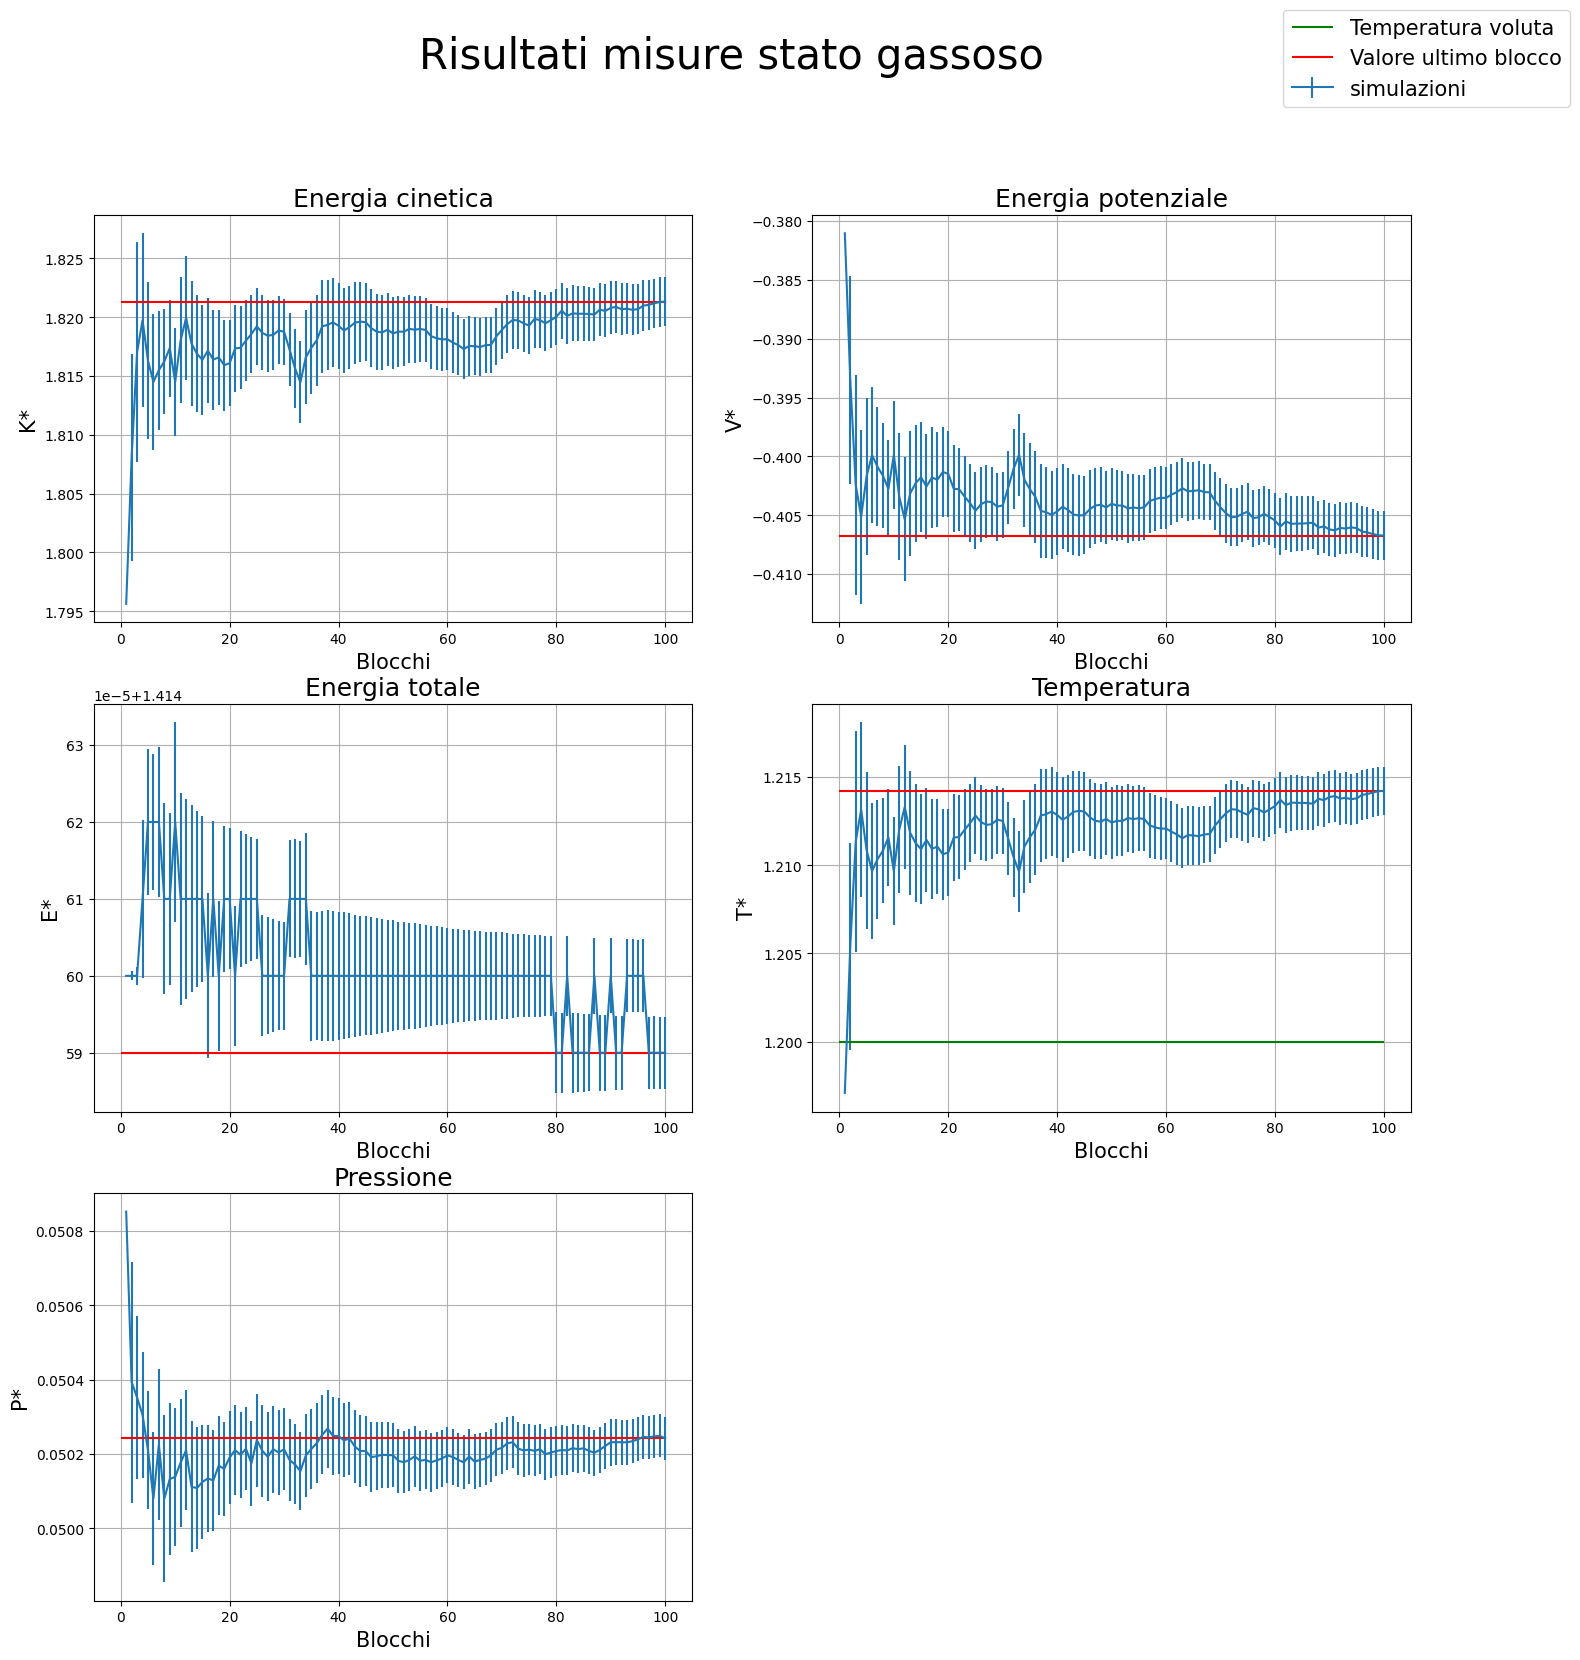

Valor medio Energia cinetica (K*/N):  1.8213 +\- 0.0021
In meV: 18.833 +\- 0.021


Valor medio Energia potenziale (V*/N):  -0.4067 +\- 0.0021
In meV: -4.206 +\- 0.021


Valor medio Energia totale (E*/N):  1.41459 +\- 5e-06
In meV: 14.6269 +\- 5e-05


Valor medio temperatura (T*):  1.2142 +\- 0.0014
In Kelvin: 145.71 +\- 0.17
Livello di confidenza con il valore voluto:  10.33 sigma
Differenza percentuale con il valore voluto: 1.01 %


Valor medio pressione (P*):  0.0502 +\- 0.0001
In atmosfere: 0.00968 +\- 1e-05




In [36]:
N=len(press) # number of blocks

x = np.arange(1,N+1)

fig, axs = plt.subplots(3,2, figsize = (17,18))
fig.suptitle("Risultati misure stato gassoso", fontsize = (30))

plt.subplot(3,2,1)
plt.errorbar(x,ekin,yerr=error_ekin)
plt.title("Energia cinetica", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("K*", fontsize = 15)
plt.hlines(ekin[-1] ,0 ,N, color = "red")
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x,epot,yerr=error_epot)
plt.title("Energia potenziale", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("V*", fontsize = 15)
plt.hlines(epot[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplot(3,2,3)
plt.errorbar(x,etot,yerr=error_etot)
plt.title("Energia totale", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("E*", fontsize = 15)
plt.hlines(etot[-1] ,0 ,N, color = "red") 
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x,temp,yerr=error_temp )
plt.title("Temperatura", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("T*", fontsize = 15)
plt.hlines(temp[-1] ,0 ,N, color = "red") 
plt.hlines(T_star ,0 ,N, color = "green" , label = "Temperatura voluta") 
plt.grid(True)

plt.subplot(3,2,5)
plt.errorbar(x,press,yerr=error_press , label = "simulazioni")
plt.title("Pressione", fontsize=18)
plt.xlabel("Blocchi", fontsize = 15)
plt.ylabel("P*", fontsize = 15)
plt.hlines(press[-1] ,0 ,N, color = "red" , label = "Valore ultimo blocco") 
plt.grid(True)

plt.subplot(3,2,6)
plt.axis("off")

fig.legend(fontsize = 15)

plt.show()


print("Valor medio Energia cinetica (K*/N): ", round(ekin[-1],4), "+\-", round(error_ekin[-1],4))
print("In meV:", round(ekin[-1]*epsilon,3), "+\-", round(error_ekin[-1]*epsilon,3))
print("\n")

print("Valor medio Energia potenziale (V*/N): ", round(epot[-1],4), "+\-", round(error_epot[-1],4))
print("In meV:", round(epot[-1]*epsilon,3), "+\-", round(error_epot[-1]*epsilon,3))
print("\n")

print("Valor medio Energia totale (E*/N): ", round(etot[-1],6), "+\-", round(error_etot[-1],6))
print("In meV:", round(etot[-1]*epsilon,4), "+\-", round(error_etot[-1]*epsilon,5))
print("\n")

print("Valor medio temperatura (T*): ", round(temp[-1],4), "+\-", round(error_temp[-1],4))
print("In Kelvin:", round(temp[-1]*T_factor,2), "+\-", round(error_temp[-1]*T_factor,2))
print("Livello di confidenza con il valore voluto: ", np.abs(round((temp[-1] - T_star)/error_temp[-1],2)), "sigma")
print("Differenza percentuale con il valore voluto:", round(100*temp[-1]/T_factor,2), "%")
print("\n")

print("Valor medio pressione (P*): ", round(press[-1],4), "+\-", round(error_press[-1],4))
print("In atmosfere:", round(press[-1]*P_factor,5), "+\-", round(error_press[-1]*P_factor,5))
print("\n")

Anche in questo terzo e ultimo caso le misure di temperatura sono consistenti con il valore desiderato, con una discrepanza dell'ordine di $1\%$. Si noti come il caso di stato gassoso presenti un'energia totale positiva; ciò è dovuto al fatto che non è uno stato legato.

Complessivamente si nota quanto aspettato, ovvero che ogni stato di aggregazione, nell'ordine mostrato, presenta una temperatura di equilibrio e un'energia totale sempre crescenti, a parità di configurazione iniziale, e pressione decrescente. 